In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [61]:
import numpy as np
import graphics as g
import interpolate as interp

def imshow(img):
    # https://gist.github.com/ctmakro/3ae3cd9538390b706820cd01dac6861f
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

print("import success")

import success


```python
def linear(p0, p1, u):
    return (1 - u) * p0 + u * p1
```

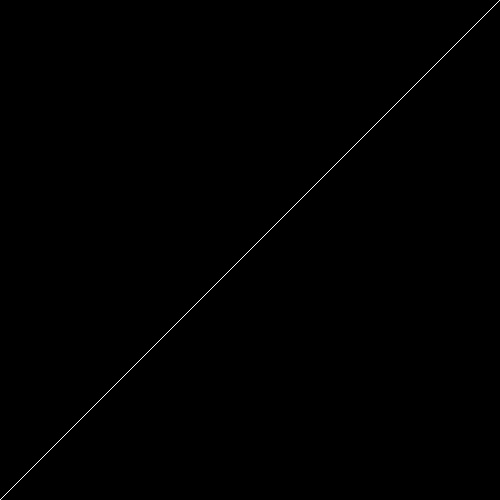

In [62]:
control_points = np.array([
    [0, 0],
    [499, 499]
], dtype=int)

curve = interp.bezier_curve(control_points, 5)

screen = g.create_screen((500, 500))
g.draw_points(screen, curve, lines=True)

imshow(screen)

```python
def quadratic(p0, p1, p2, u):
    p0_u = linear(p0, p1, u)
    p1_u = linear(p1, p2, u)

    return linear(p0_u, p1_u, u)
```

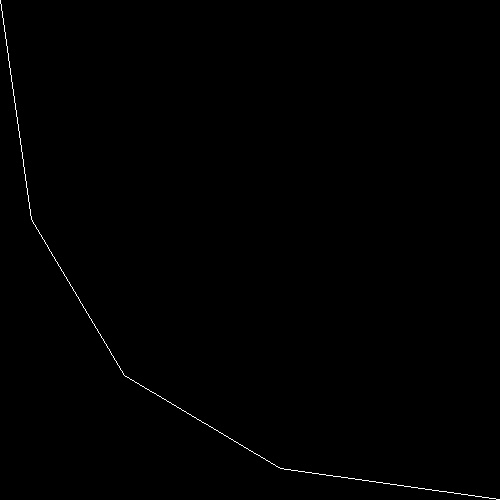

In [63]:
control_points = np.array([
    [0, 499],
    [0, 0],
    [499, 0]
], dtype=int)

curve = interp.bezier_curve(control_points, 5)

screen = g.create_screen((500, 500))
g.draw_points(screen, curve, lines=True)

imshow(screen)

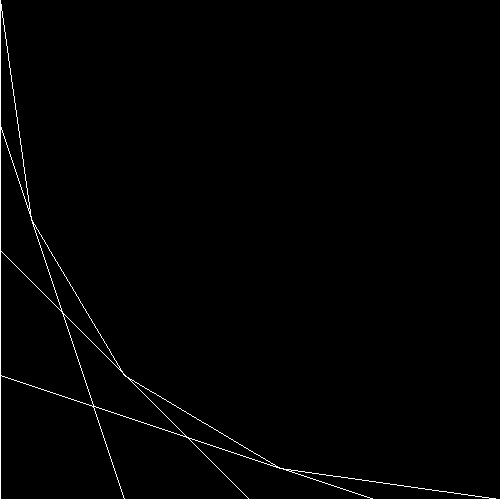

In [64]:
for i, u in enumerate(np.linspace(0, 1, 5)):
    p0 = interp.linear(*control_points[0:2], u)
    p1 = interp.linear(*control_points[1:3], u)
    g.draw_line(screen, p0.astype(int), p1.astype(int))

imshow(screen)

```python
def cubic(p0, p1, p2, p3, u):
    p0_u = quadratic(p0, p1, p2, u)
    p1_u = quadratic(p1, p2, p3, u)

    return linear(p0_u, p1_u, u)
```

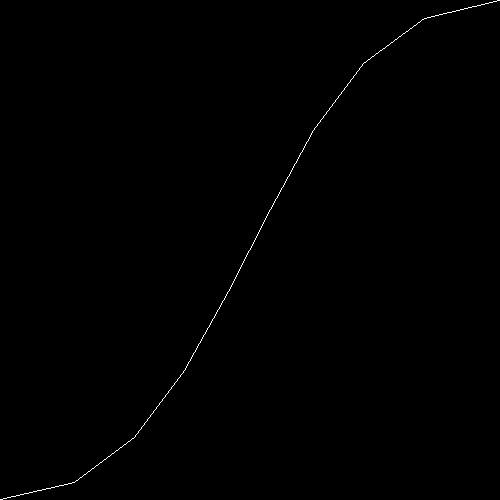

In [65]:
control_points = np.array([
    [0, 0],
    [249, 0],
    [249, 499],
    [499, 499]
], dtype=int)


curve = interp.bezier_curve(control_points, 10)

screen = g.create_screen((500, 500))
g.draw_points(screen, curve, lines=True)

imshow(screen)

```python
def de_castlejau(points, u):
    if len(points) == 1:
        return points[0]
    else:
        p0 = de_castlejau(points[0:-1], u)
        p1 = de_castlejau(points[1:], u)

        return linear(p0, p1, u)
```

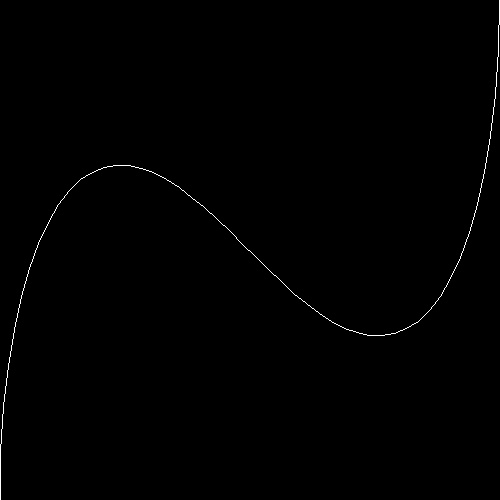

In [66]:
control_points = np.array([
    [0, 0],
    [0, 499],
    [249, 499],
    [249, 0],
    [499, 0],
    [499, 499]
], dtype=float)

curve = interp.bezier_curve(control_points, 50)

screen = g.create_screen((500, 500))
g.draw_points(screen, curve, lines=True)

imshow(screen)